In [1]:
!pip install pycaret[full]

     |████████████████████████████████| 319 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 35.0 MB/s 
     |████████████████████████████████| 1.3 MB 32.6 MB/s 
     |████████████████████████████████| 167 kB 50.9 MB/s 
     |████████████████████████████████| 116 kB 44.0 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 31.5 MB/s 
     |████████████████████████████████| 1.7 MB 37.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 51.6 MB/s 
     |████████████████████████████████| 16.5 MB 115 kB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 177 kB 49.2 MB/s 
     |████████████████████████████████| 132 kB 49.9 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
pip uninstall PyYAML

Found existing installation: PyYAML 5.4.1
Uninstalling PyYAML-5.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PyYAML-5.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/_yaml/*
    /usr/local/lib/python3.7/dist-packages/yaml/*
Proceed (y/n)? y
  Successfully uninstalled PyYAML-5.4.1


In [3]:
pip install PyYAML==5.4.1

  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)


In [4]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/Data.xlsx')
df.head()

Fine  Coarse  GGBS  OPC  SF  Water  Admixture  Fine MC  Coarse MC  Days  \
0   842     878   246  248  55    144      12.63      3.3        0.2     7   
1   842     878   246  248  55    144      12.63      3.3        0.2    28   
2   842     878   246  248  55    144      12.63      3.3        0.2    56   
3   842     878   246  248  55    144      12.63      3.3        0.2    91   
4   863     872   248  246  55    142      12.64      4.2        1.0     7   

     Strength  
0   75.300000  
1   97.166667  
2  108.666667  
3  117.133333  
4   75.200000

In [8]:
round(df.describe(),1)

Fine  Coarse   GGBS    OPC     SF  Water  Admixture  Fine MC  \
count  152.0   152.0  152.0  152.0  152.0  152.0      152.0    152.0   
mean   871.7   874.3  246.6  246.3   54.4  138.7       12.2      4.4   
std     11.7    10.2    1.4    0.9    0.6    2.9        0.5      0.7   
min    842.0   857.0  244.0  244.0   53.0  135.0       11.5      3.2   
25%    863.0   866.0  246.0  246.0   54.0  137.0       11.6      4.0   
50%    870.0   874.0  246.0  246.0   54.0  138.0       12.6      4.2   
75%    879.0   879.0  248.0  247.0   55.0  139.0       12.6      5.0   
max    900.0   904.0  250.0  248.0   56.0  149.0       12.7      6.0   

       Coarse MC   Days  Strength  
count      152.0  152.0     152.0  
mean         0.5   45.5     105.2  
std          0.2   31.6      14.6  
min          0.2    7.0      70.3  
25%          0.3   22.8      94.5  
50%          0.5   42.0     107.9  
75%          0.6   64.8     115.7  
max          1.0   91.0     131.4

In [9]:
df.shape

(152, 11)

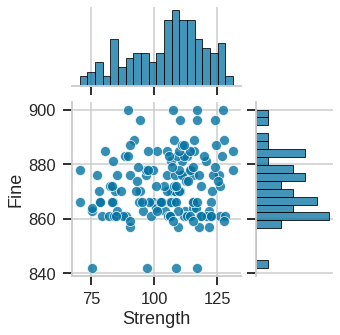

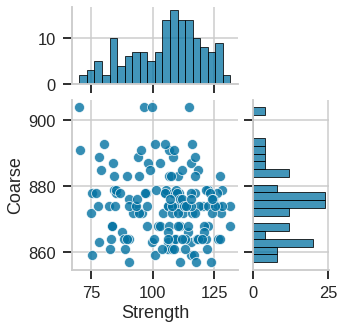

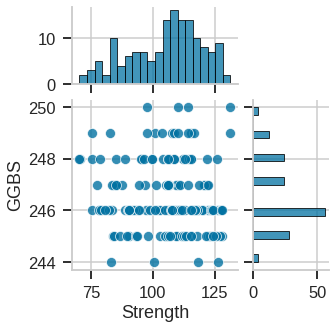

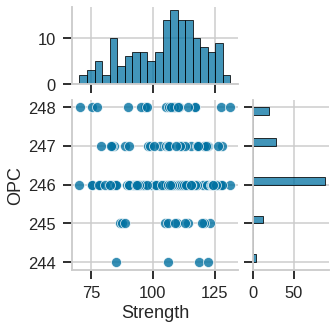

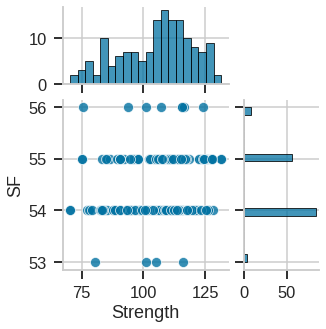

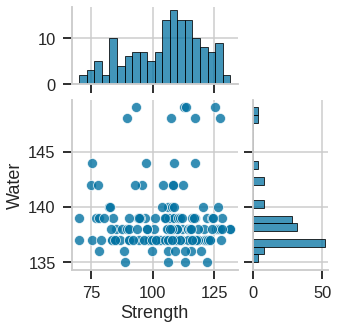

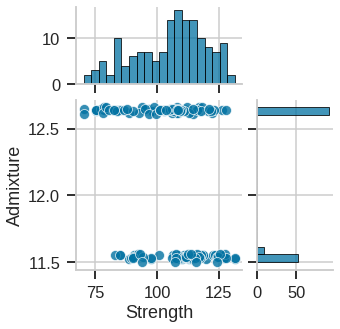

In [10]:
x = "Strength"
sns.set_context("talk")
sns.jointplot(data = df, y="Fine", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=False, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Coarse", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="GGBS", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="OPC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="SF", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Water", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Admixture", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Days", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
#sns.jointplot(data = df, y="Fine MC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=False, height = 5, ratio=2, s=100, alpha=0.8)
#sns.jointplot(data = df, y="Coarse MC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)

In [11]:
round(df.corr( ),2)

Fine  Coarse  GGBS   OPC    SF  Water  Admixture  Fine MC  \
Fine       1.00    0.06  0.00 -0.03  0.13   0.12      -0.57     0.64   
Coarse     0.06    1.00 -0.07  0.16 -0.23   0.18       0.24     0.03   
GGBS       0.00   -0.07  1.00  0.02  0.13  -0.17       0.14    -0.01   
OPC       -0.03    0.16  0.02  1.00 -0.11   0.27       0.16     0.13   
SF         0.13   -0.23  0.13 -0.11  1.00   0.05      -0.45     0.45   
Water      0.12    0.18 -0.17  0.27  0.05   1.00      -0.14     0.29   
Admixture -0.57    0.24  0.14  0.16 -0.45  -0.14       1.00    -0.62   
Fine MC    0.64    0.03 -0.01  0.13  0.45   0.29      -0.62     1.00   
Coarse MC  0.03   -0.05  0.02 -0.14  0.22   0.06      -0.11     0.31   
Days      -0.00   -0.00 -0.00  0.00  0.00   0.00      -0.00     0.00   
Strength   0.13   -0.16 -0.07 -0.05  0.13   0.01      -0.27     0.16   

           Coarse MC  Days  Strength  
Fine            0.03 -0.00      0.13  
Coarse         -0.05 -0.00     -0.16  
GGBS            0.02 -0.00     -0.07  
OPC            -0.14  0.00     -0.05  
SF              0.22  0.00      0.13  
Water           0.06  0.00      0.01  
Admixture      -0.11 -0.00     -0.27  
Fine MC         0.31  0.00      0.16  
Coarse MC       1.00  0.00     -0.04  
Days            0.00  1.00      0.86  
Strength       -0.04  0.86      1.00

<AxesSubplot:>

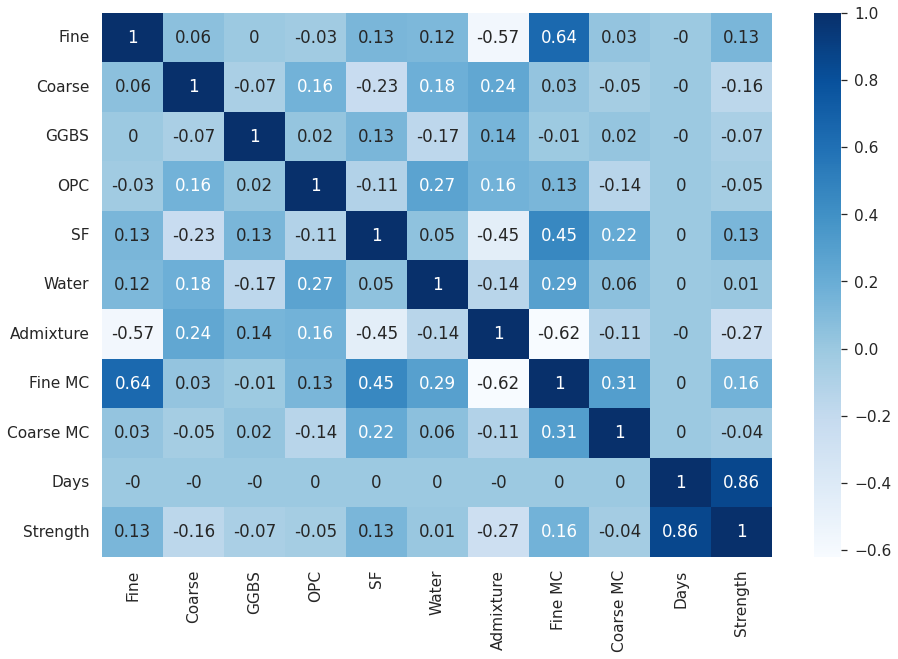

In [12]:
df_corr = round(df.corr( ),2)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(df_corr,annot=True,cmap=plt.cm.Blues)

In [13]:
from pycaret.regression import *

In [14]:
reg1 = setup(df, target = 'Strength', session_id=123, normalize = True, normalize_method = 'zscore', numeric_features = ['Fine','Coarse','GGBS','OPC','SF','Water','Admixture','Days'], use_gpu = True)

Description             Value
0                               session_id               123
1                                   Target          Strength
2                            Original Data         (152, 11)
3                           Missing Values             False
4                         Numeric Features                10
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (106, 10)
10                    Transformed Test Set          (46, 10)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU              True
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              88d8
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [15]:
best_model = compare_models(fold = 10)

Model      MAE       MSE     RMSE      R2  \
lightgbm  Light Gradient Boosting Machine   3.5972   19.9448   4.3738  0.8583   
catboost               CatBoost Regressor   3.6119   21.8034   4.5927  0.8484   
gbr           Gradient Boosting Regressor   4.0171   22.3241   4.6720  0.8343   
ada                    AdaBoost Regressor   4.1960   26.5895   5.0514  0.8135   
xgboost         Extreme Gradient Boosting   3.9467   26.8653   5.0207  0.8080   
et                  Extra Trees Regressor   4.1713   25.4122   4.9969  0.8009   
rf                Random Forest Regressor   4.1911   26.4065   5.0755  0.7988   
lasso                    Lasso Regression   5.2806   44.0473   6.4899  0.7138   
br                         Bayesian Ridge   5.2179   42.0512   6.4088  0.6955   
ridge                    Ridge Regression   5.2135   42.0477   6.4129  0.6928   
lr                      Linear Regression   5.2223   42.1630   6.4250  0.6897   
lar                Least Angle Regression   5.2223   42.1630   6.4250  0.6897   
huber                     Huber Regressor   5.3025   43.1248   6.4936  0.6842   
dt                Decision Tree Regressor   5.5486   45.4278   6.6841  0.6559   
omp           Orthogonal Matching Pursuit   6.0525   56.4923   7.3230  0.6359   
en                            Elastic Net   6.5603   64.5206   7.7853  0.6218   
par          Passive Aggressive Regressor   5.9786   55.7276   7.3044  0.5331   
knn                 K Neighbors Regressor   8.0690   94.6940   9.5817  0.3605   
llar         Lasso Least Angle Regression   9.8418  153.5510  11.9104  0.1469   
dummy                     Dummy Regressor  11.1247  193.2683  13.5214 -0.1277   

           RMSLE    MAPE  TT (Sec)  
lightgbm  0.0425  0.0350     0.022  
catboost  0.0451  0.0354     0.444  
gbr       0.0450  0.0390     0.116  
ada       0.0487  0.0409     0.223  
xgboost   0.0470  0.0375     0.586  
et        0.0484  0.0405     1.287  
rf        0.0489  0.0408     0.803  
lasso     0.0651  0.0529     0.010  
br        0.0637  0.0518     0.009  
ridge     0.0636  0.0517     0.014  
lr        0.0636  0.0517     0.008  
lar       0.0636  0.0517     0.017  
huber     0.0641  0.0524     0.020  
dt        0.0657  0.0546     0.009  
omp       0.0720  0.0598     0.012  
en        0.0789  0.0665     0.010  
par       0.0720  0.0583     0.008  
knn       0.0961  0.0816     0.189  
llar      0.1179  0.0997     0.013  
dummy     0.1328  0.1124     0.005

In [16]:
lgbm_train = create_model('lightgbm', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
Fold                                      
0     3.12  14.92  3.86  0.91   0.03  0.03
1     3.29  14.78  3.84  0.85   0.04  0.03
2     5.05  40.54  6.37  0.90   0.07  0.05
3     3.78  20.36  4.51  0.70   0.04  0.03
4     2.98  15.28  3.91  0.84   0.04  0.03
5     3.58  16.28  4.03  0.94   0.04  0.03
6     4.20  25.70  5.07  0.90   0.06  0.04
7     3.87  27.09  5.20  0.69   0.05  0.04
8     2.56   8.91  2.99  0.96   0.03  0.02
9     3.54  15.60  3.95  0.91   0.04  0.03
Mean  3.60  19.94  4.37  0.86   0.04  0.04
Std   0.66   8.58  0.90  0.09   0.01  0.01

In [17]:
print(lgbm_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [18]:
lgbm_train_graph = evaluate_model(lgbm_train)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
lgbm_test = predict_model(lgbm_train)

Model    MAE      MSE    RMSE      R2   RMSLE  \
0  Light Gradient Boosting Machine  3.287  16.8026  4.0991  0.9355  0.0421   

     MAPE  
0  0.0335

In [20]:
lgbm_tune = tune_model(lgbm_train)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.7808  11.8867  3.4477  0.9269  0.0296  0.0249
1     2.2369   7.6755  2.7705  0.9200  0.0274  0.0222
2     4.5306  30.4375  5.5170  0.9237  0.0578  0.0477
3     3.2774  16.7631  4.0943  0.7534  0.0372  0.0298
4     4.3538  28.5597  5.3441  0.7027  0.0509  0.0430
5     3.1311  15.9921  3.9990  0.9373  0.0369  0.0295
6     3.5355  17.1736  4.1441  0.9344  0.0466  0.0386
7     4.1100  31.3108  5.5956  0.6401  0.0508  0.0387
8     2.6867   9.9355  3.1521  0.9509  0.0280  0.0247
9     3.8200  19.5133  4.4174  0.8823  0.0416  0.0362
Mean  3.4463  18.9248  4.2482  0.8572  0.0407  0.0335
Std   0.7209   8.0769  0.9369  0.1081  0.0101  0.0081

In [21]:
print(lgbm_tune)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.4, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
              random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [22]:
lgbm_tune_graph = evaluate_model(lgbm_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
lgbm_tune_test = predict_model(lgbm_tune)

Model     MAE      MSE    RMSE      R2  RMSLE  \
0  Light Gradient Boosting Machine  3.4966  18.6789  4.3219  0.9283  0.047   

     MAPE  
0  0.0364

In [24]:
catb_train = create_model('catboost', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
Fold                                      
0     3.37  18.10  4.25  0.89   0.04  0.03
1     3.45  15.04  3.88  0.84   0.04  0.03
2     4.85  45.13  6.72  0.89   0.07  0.05
3     4.64  25.09  5.01  0.63   0.05  0.04
4     3.27  18.23  4.27  0.81   0.04  0.03
5     3.51  18.60  4.31  0.93   0.04  0.03
6     3.35  26.20  5.12  0.90   0.06  0.04
7     3.02  19.08  4.37  0.78   0.04  0.03
8     2.75  12.00  3.46  0.94   0.04  0.03
9     3.90  20.57  4.54  0.88   0.04  0.04
Mean  3.61  21.80  4.59  0.85   0.05  0.04
Std   0.64   8.73  0.84  0.09   0.01  0.01

In [25]:
print(catb_train)

In [26]:
catb_train_graph = evaluate_model(catb_train)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
catb_test = predict_model(catb_train)

Model     MAE      MSE   RMSE      R2   RMSLE    MAPE
0  CatBoost Regressor  3.9703  29.1063  5.395  0.8883  0.0585  0.0422

In [28]:
catb_tune = tune_model(catb_train)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.5775  19.6398  4.4317  0.8792  0.0387  0.0323
1     3.3265  14.5324  3.8121  0.8485  0.0368  0.0332
2     4.4930  33.6698  5.8026  0.9156  0.0630  0.0482
3     3.9133  19.9891  4.4709  0.7059  0.0401  0.0355
4     3.3821  15.9484  3.9935  0.8340  0.0378  0.0330
5     2.8393  12.6118  3.5513  0.9506  0.0324  0.0266
6     3.3869  21.5484  4.6420  0.9177  0.0524  0.0365
7     3.3998  17.6250  4.1982  0.7974  0.0396  0.0327
8     1.6765   5.6245  2.3716  0.9722  0.0211  0.0156
9     3.6705  17.0054  4.1238  0.8974  0.0396  0.0344
Mean  3.3665  17.8195  4.1398  0.8719  0.0402  0.0328
Std   0.6959   6.8118  0.8257  0.0749  0.0106  0.0077

In [29]:
print(catb_tune)

In [30]:
catb_tune_graph = evaluate_model(catb_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
catb_tune_test = predict_model(catb_tune)

Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  CatBoost Regressor  3.5505  20.5237  4.5303  0.9212  0.0484  0.0372

In [32]:
gbr_train = create_model('gbr', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
Fold                                      
0     4.60  26.45  5.14  0.84   0.05  0.04
1     3.40  13.87  3.72  0.86   0.04  0.03
2     4.16  25.63  5.06  0.94   0.05  0.04
3     4.38  23.79  4.88  0.65   0.04  0.04
4     3.87  20.52  4.53  0.79   0.04  0.04
5     4.99  33.50  5.79  0.87   0.06  0.05
6     3.64  18.20  4.27  0.93   0.05  0.04
7     4.24  30.15  5.49  0.65   0.05  0.04
8     3.10  11.98  3.46  0.94   0.03  0.03
9     3.80  19.15  4.38  0.88   0.04  0.03
Mean  4.02  22.32  4.67  0.83   0.05  0.04
Std   0.54   6.52  0.70  0.10   0.01  0.01

In [33]:
print(gbr_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [34]:
gbr_train_graph = evaluate_model(gbr_train)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [35]:
gbr_test = predict_model(gbr_train)

Model     MAE      MSE    RMSE      R2   RMSLE  \
0  Gradient Boosting Regressor  3.2369  17.8221  4.2216  0.9316  0.0456   

     MAPE  
0  0.0342

In [36]:
gbr_tune = tune_model(gbr_train)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.9092  21.2716  4.6121  0.8691  0.0409  0.0359
1     2.5713   8.8953  2.9825  0.9073  0.0309  0.0262
2     4.9772  36.4023  6.0334  0.9088  0.0585  0.0493
3     5.0913  29.1448  5.3986  0.5713  0.0482  0.0461
4     4.1521  24.5605  4.9559  0.7444  0.0464  0.0402
5     3.3980  22.0738  4.6983  0.9135  0.0444  0.0327
6     3.5977  20.1878  4.4931  0.9229  0.0465  0.0378
7     4.5170  42.4870  6.5182  0.5116  0.0595  0.0431
8     3.9267  21.6010  4.6477  0.8932  0.0418  0.0359
9     3.6216  21.1223  4.5959  0.8726  0.0408  0.0324
Mean  3.9762  24.7746  4.8936  0.8115  0.0458  0.0380
Std   0.7178   8.8557  0.9098  0.1440  0.0080  0.0066

In [37]:
print(gbr_tune)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [38]:
gbr_tune_graph = evaluate_model(gbr_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
gbr_tune_test = predict_model(gbr_tune)

Model     MAE      MSE    RMSE      R2  RMSLE    MAPE
0  Gradient Boosting Regressor  3.4218  19.3507  4.3989  0.9257  0.047  0.0359

In [40]:
adab_train = create_model('ada', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
Fold                                      
0     3.86  23.38  4.84  0.86   0.04  0.04
1     3.62  21.92  4.68  0.77   0.05  0.04
2     6.08  51.80  7.20  0.87   0.07  0.06
3     3.90  20.45  4.52  0.70   0.04  0.04
4     4.17  25.42  5.04  0.74   0.05  0.04
5     5.11  36.11  6.01  0.86   0.06  0.05
6     3.17  16.91  4.11  0.94   0.05  0.03
7     4.79  33.10  5.75  0.62   0.05  0.05
8     2.43  10.36  3.22  0.95   0.03  0.02
9     4.83  26.45  5.14  0.84   0.05  0.04
Mean  4.20  26.59  5.05  0.81   0.05  0.04
Std   0.99  10.94  1.04  0.10   0.01  0.01

In [41]:
print(adab_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [42]:
adab_train_graph = evaluate_model(adab_train)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
adab_test = predict_model(adab_train)

Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  AdaBoost Regressor  4.1736  28.4565  5.3345  0.8907  0.0561  0.0437

In [44]:
adab_tune = tune_model(adab_train)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.8197  23.2274  4.8195  0.8571  0.0455  0.0358
1     3.2873  15.9641  3.9955  0.8336  0.0391  0.0332
2     5.9428  46.1744  6.7952  0.8843  0.0697  0.0606
3     3.7282  20.5518  4.5334  0.6977  0.0415  0.0344
4     3.5774  20.3015  4.5057  0.7887  0.0416  0.0343
5     5.1208  38.9533  6.2413  0.8474  0.0621  0.0502
6     3.4096  21.6068  4.6483  0.9175  0.0502  0.0359
7     4.6062  31.3173  5.5962  0.6400  0.0524  0.0442
8     2.3640  11.3246  3.3652  0.9440  0.0300  0.0216
9     4.4359  22.1990  4.7116  0.8661  0.0447  0.0417
Mean  4.0292  25.1620  4.9212  0.8276  0.0477  0.0392
Std   0.9694  10.0783  0.9716  0.0901  0.0109  0.0101

In [45]:
print(adab_tune)

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='square',
                  n_estimators=130, random_state=123)


In [46]:
adab_tune_graph = evaluate_model(adab_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
adab_tune_test = predict_model(adab_tune)

Model     MAE      MSE    RMSE     R2  RMSLE    MAPE
0  AdaBoost Regressor  3.9839  26.5704  5.1546  0.898  0.056  0.0424

In [48]:
xgb_train = create_model('xgboost', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
Fold                                      
0     4.89  46.75  6.84  0.71   0.06  0.04
1     2.91  13.14  3.63  0.86   0.03  0.03
2     4.76  47.33  6.88  0.88   0.07  0.05
3     4.52  22.66  4.76  0.67   0.04  0.04
4     3.87  22.92  4.79  0.76   0.04  0.04
5     4.46  30.16  5.49  0.88   0.06  0.04
6     3.07  17.32  4.16  0.93   0.04  0.03
7     4.95  39.61  6.29  0.54   0.06  0.05
8     2.40   7.78  2.79  0.96   0.03  0.02
9     3.64  20.98  4.58  0.87   0.04  0.03
Mean  3.95  26.87  5.02  0.81   0.05  0.04
Std   0.86  13.03  1.29  0.13   0.01  0.01

In [49]:
print(xgb_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='gpu_hist',
             validate_parameters=1, verbosity=0)


In [50]:
xgb_train_graph = evaluate_model(xgb_train)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
xgb_test = predict_model(xgb_train)

Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Extreme Gradient Boosting  3.6365  21.8577  4.6752  0.9161  0.0465  0.0364

In [52]:
xgb_tune = tune_model(xgb_train)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.1914   9.2905  3.0480  0.9428  0.0269  0.0200
1     3.4050  16.3103  4.0386  0.8300  0.0379  0.0337
2     4.7783  32.9280  5.7383  0.9175  0.0619  0.0506
3     3.8256  20.0034  4.4725  0.7057  0.0405  0.0347
4     3.0821  15.7448  3.9680  0.8361  0.0372  0.0297
5     3.3697  16.7751  4.0957  0.9343  0.0390  0.0326
6     3.4704  15.2038  3.8992  0.9420  0.0413  0.0365
7     3.3729  24.7525  4.9752  0.7154  0.0474  0.0324
8     2.4203  10.8818  3.2988  0.9462  0.0285  0.0218
9     2.6955   9.6430  3.1053  0.9418  0.0276  0.0242
Mean  3.2611  17.1533  4.0640  0.8712  0.0388  0.0316
Std   0.7009   6.9203  0.7985  0.0902  0.0100  0.0083

In [53]:
print(xgb_tune)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0.0001,
             reg_lambda=0.2, scale_pos_weight=37.7, subsample=0.2,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)


In [54]:
xgb_tune_graph = evaluate_model(xgb_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
xgb_tune_test = predict_model(xgb_tune)

Model     MAE        MSE    RMSE      R2   RMSLE  \
0  Extreme Gradient Boosting  3.4379  18.358801  4.2847  0.9295  0.0437   

     MAPE  
0  0.0348